# Ecuación de difussión en 2D

En 2D, la ecuación de difusión en dos dimensiones es

$$\frac{\partial u}{\partial t} = \nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)$$

Discrretizando la ecuación tenemos

$$\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^n}{\Delta t} = \nu \left( \frac{u_{(i,j)}^{n}+u_{(i-1,j)}^n-2u_{(i,j)}^n}{(\Delta x)^2} + \frac{u_{(i,j)}^{n}+u_{(i,j-1)}^n-2u_{(i,j)}^n}{(\Delta y)^2}\right)$$

De donde

$$u_{(i,j)}^{n+1}= u_{(i,j)}^n + \frac{\nu \Delta t}{(\Delta x)^2}\left( u_{(i,j)}^{n}-u_{(i-1,j)}^n -2u_{(i,j)}^n\right)+ \frac{\nu \Delta t}{(\Delta y)^2}\left( u_{(i,j)}^{n}-u_{(i,j-1)}^n -2u_{(i,j)}^n\right)$$


In [1]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

A continuación ponemos las condiciones iniciales como funciones escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.1,0.5)\times(0.1,0.5)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$
Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

In [6]:
def avance_en_tiempo(nt, nx, ny, dx, dy, sigma):
    nu = 1.          #La velocidad de la propagacion
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    t = 0
    un = ones((ny,nx))
    u = ones((ny,nx))
    
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    for n in range(nt):
        dt = sigma*min(dx**2,dy**2)/nu
        t = t+dt
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
        
        u[1:-1,1:-1] = un[1:-1,1:-1]+nu*dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        nu*dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])

        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
    return u, t

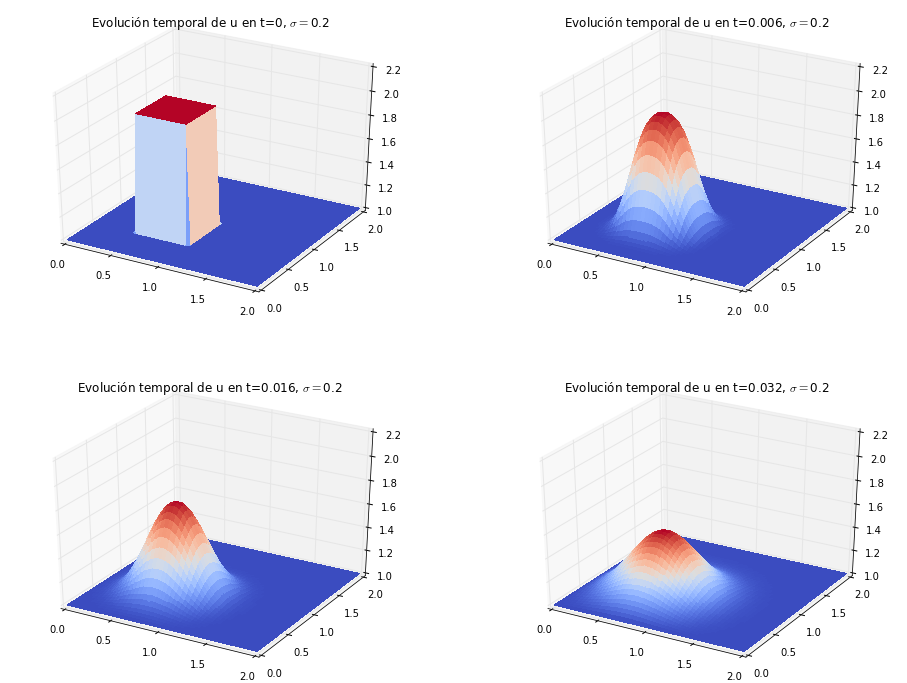

In [8]:
L = 2.

nx = 51
ny = 51
dx = 2./(nx-1)
dy = 2./(ny-1)
sigma = 0.2

x = linspace(0,L,nx)
y = linspace(0,L,ny)
X, Y = meshgrid(x,y)

fig = figure(figsize=(16, 12), dpi=200)
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')
ex = fig.add_subplot(224, projection='3d')

u = ones((ny,nx))
u[int(.5/dy):int(1./dy+1),  int(.5/dx):int(1./dx+1)] = 2 

ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

U1, t1 = avance_en_tiempo(20, nx, ny, dx, dy, sigma)
bx.plot_surface(X, Y, U1[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

U2, t2 = avance_en_tiempo(50, nx, ny, dx, dy, sigma)
cx.plot_surface(X, Y, U2[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

U3, t3 = avance_en_tiempo(100, nx, ny, dx, dy, sigma)
ex.plot_surface(X, Y, U3[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_title(u"Evolución temporal de u en t=0, $\sigma = $"+str(sigma))
bx.set_title(u"Evolución temporal de u en t="+str(trunc(1000*t1)/1000)+", $\sigma = $"+str(sigma))
cx.set_title(u"Evolución temporal de u en t="+str(trunc(1000*t2)/1000)+", $\sigma = $"+str(sigma))
ex.set_title(u"Evolución temporal de u en t="+str(trunc(1000*t3)/1000)+", $\sigma = $"+str(sigma))

ax.set_zlim(1,2.2)
bx.set_zlim(1,2.2)
cx.set_zlim(1,2.2)
ex.set_zlim(1,2.2);